In [1]:
import sys

sys.path.append("../src")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.integrate import quad
from scipy.optimize import minimize
import sto_ng
import gaussian_overlap_function
import h5py

importlib.reload(sto_ng)
importlib.reload(gaussian_overlap_function)
from sto_ng import *
from gaussian_overlap_function import *

In [3]:
with h5py.File("sto_ng.h5", "r") as f:
    optimized_params_1s = f["1s/sto-3g/optimized_params"][:]
    optimized_params_2s2p = f["2s2p/sto-2g/optimized_params"][:]

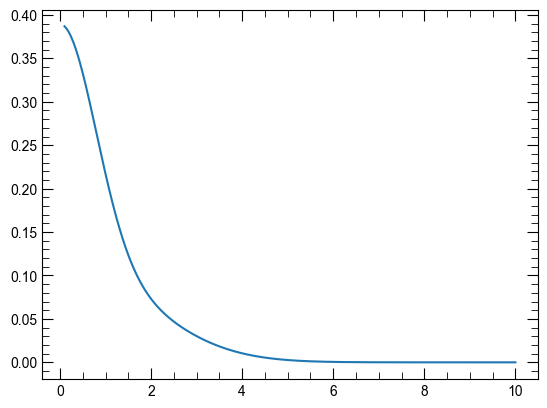

In [4]:
approximator = GaussianApproximator1s(optimized_params_1s, 1.0)
r = np.linspace(0.1, 10, 1000)
y = approximator.phi_approx_g1s(optimized_params_1s, r)
fig, ax = plt.subplots()
ax.plot(r, y)

In [6]:
RA = np.ndarray([0, 0, 0])
RB = np.ndarray([0, 0, 0])
RC = np.ndarray([0, 0, 0])
RD = np.ndarray([0, 0, 0])

In [8]:
def energy_1e(scale):
    result = 0
    for i in range(3):
        for j in range(3):
            alpha = optimized_params_1s[2 * i] * scale**2
            beta = optimized_params_1s[2 * j] * scale**2
            c_i = optimized_params_1s[2 * i + 1]
            c_j = optimized_params_1s[2 * j + 1]
            result += c_i * c_j * (T(alpha, beta, RA, RB) + V(alpha, beta, RA, RB, RC))
    return 2 * result


def energy_2e(scale):
    result = 0
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    alpha = optimized_params_1s[2 * i] * scale**2
                    beta = optimized_params_1s[2 * j] * scale**2
                    gamma = optimized_params_1s[2 * k] * scale**2
                    delta = optimized_params_1s[2 * l] * scale**2
                    c_i = optimized_params_1s[2 * i + 1]
                    c_j = optimized_params_1s[2 * j + 1]
                    c_k = optimized_params_1s[2 * k + 1]
                    c_l = optimized_params_1s[2 * l + 1]
                    result += (
                        c_i
                        * c_j
                        * c_k
                        * c_l
                        * (U(alpha, beta, gamma, delta, RA, RB, RC, RD))
                    )
    return result


def total_energy(scale):
    return energy_1e(scale) + energy_2e(scale)

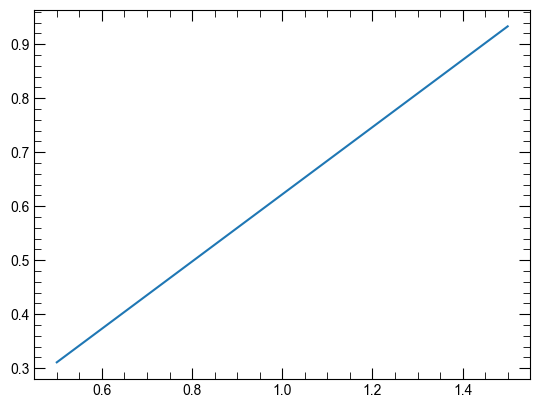

In [9]:
scales = np.linspace(0.5, 1.5, 100)
energies = np.array([energy_2e(scale) for scale in scales])
plt.plot(scales, energies)

In [10]:
energy_2e(0.1)

0.06220338010055548

In [11]:
minimize(total_energy, 1.0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.439389699746578
        x: [ 6.780e-01]
      nit: 1
      jac: [ 1.863e-08]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

In [12]:
results = []
scales = np.linspace(0.0, 1.5, 100)
for scale in scales:
    results.append(total_energy(scale))

/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:11: RuntimeWarning: invalid value encountered in scalar divide
  alpha
/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:14: RuntimeWarning: invalid value encountered in scalar divide
  * (6 - 4 * alpha * beta / (alpha + beta) * np.linalg.norm(RA - RB) ** 2)
/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  * (np.pi / (alpha + beta)) ** (3 / 2)
/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:16: RuntimeWarning: invalid value encountered in scalar divide
  * np.exp(-alpha * beta * np.linalg.norm(RA - RB) ** 2 / (alpha + beta))
/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  -2
/home/yamamoto/physics/molecule/examples/../src/gaussian_overlap_function.py:29: RuntimeWarning:

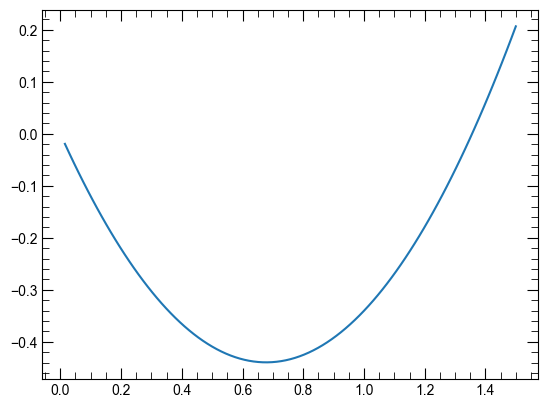

In [13]:
fig, ax = plt.subplots()
ax.plot(scales, results)

In [14]:
optimized_params_1s[0] * optimized_params_1s[1]

0.3663985280399792

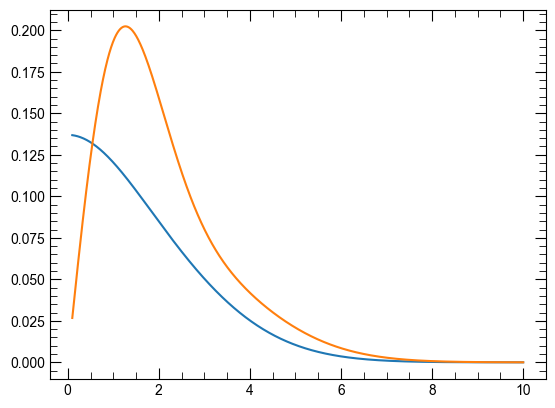

In [15]:
approximator = GaussianApproximator2s2p(optimized_params_2s2p, 1.0)
r = np.linspace(0.1, 10, 1000)
y2s = approximator.phi_approx_g1s(optimized_params_2s2p, r)
y2p = approximator.phi_approx_g2p(optimized_params_2s2p, r)
fig, ax = plt.subplots()
ax.plot(r, y2s)
ax.plot(r, y2p)